In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans as kmeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [8]:
# Dataset 1 (Digit recognition)
df = pd.read_csv("../Classification/train.csv")
df = df.sample(frac=0.3, random_state=0, axis=0)

X = df.drop('label',1)
Y = df['label']

X = StandardScaler().fit_transform(X)

In [10]:
Y.value_counts()

1    1429
7    1334
3    1298
2    1276
6    1243
0    1242
4    1236
9    1219
8    1204
5    1119
Name: label, dtype: int64

# K-means

In [3]:
km = kmeans(random_state=0)
k_list = [2, 4, 6, 8, 10, 12, 14, 16]

In [4]:
ARI = []
NMIS = []
AMIS = []
homo = []
comp = []
v_meas = []
silhouette = []

for k in k_list:
    km.set_params(n_clusters=k)
    km.fit(X)
    Y_pred = km.predict(X)
    ARI.append(metrics.adjusted_rand_score(Y, Y_pred))  
    NMIS.append(metrics.normalized_mutual_info_score(Y, Y_pred)) 
    AMIS.append(metrics.adjusted_mutual_info_score(Y, Y_pred)) 
    homo.append(metrics.homogeneity_score(Y, Y_pred)) 
    comp.append(metrics.completeness_score(Y, Y_pred))
    v_meas.append(metrics.v_measure_score(Y, Y_pred))
    silhouette.append(metrics.silhouette_score(X, Y_pred, metric='euclidean'))
    print("finish {}-clusters clustering".format(k))

finish 2-clusters clustering
finish 4-clusters clustering
finish 6-clusters clustering
finish 8-clusters clustering
finish 10-clusters clustering
finish 12-clusters clustering
finish 14-clusters clustering
finish 16-clusters clustering


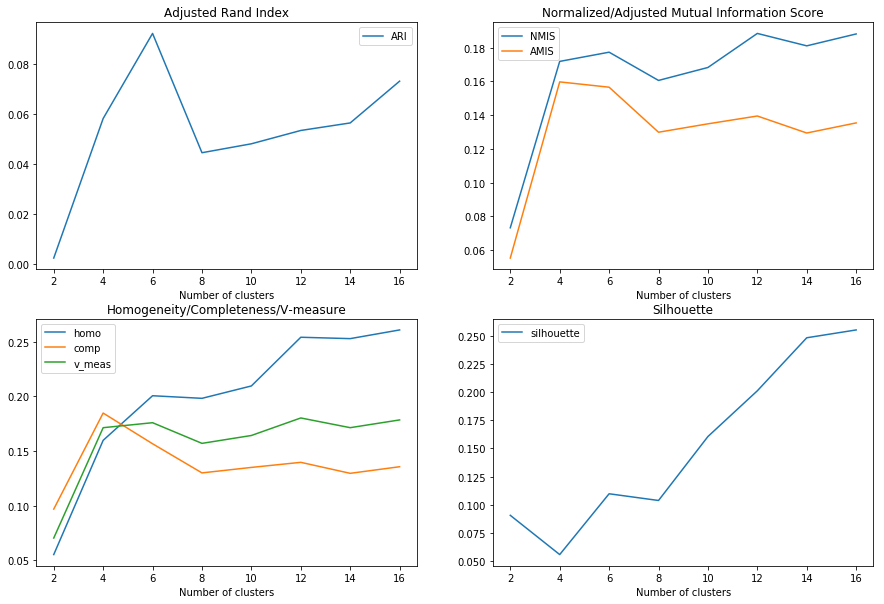

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ARI_h, = plt.plot(k_list, ARI)
plt.xlabel("Number of clusters")
plt.title("Adjusted Rand Index")
plt.legend([ARI_h], ['ARI'])

plt.subplot(2,2,2)
NMIS_h, = plt.plot(k_list, NMIS)
AMIS_h, = plt.plot(k_list, AMIS)
plt.xlabel("Number of clusters")
plt.title("Normalized/Adjusted Mutual Information Score")
plt.legend([NMIS_h, AMIS_h], ['NMIS', 'AMIS'])

plt.subplot(2,2,3)
homo_h, = plt.plot(k_list, homo)
comp_h, = plt.plot(k_list, comp)
v_meas_h, = plt.plot(k_list, v_meas)
plt.xlabel("Number of clusters")
plt.title("Homogeneity/Completeness/V-measure")
plt.legend([homo_h, comp_h, v_meas_h], ['homo', 'comp', 'v_meas'])


plt.subplot(2,2,4)
silhouette_h, = plt.plot(k_list, silhouette)
plt.xlabel("Number of clusters")
plt.title("Silhouette")
plt.legend([silhouette_h], ['silhouette'])
plt.show()

# Gaussian Mixture Models

In [6]:
gmm = GMM(random_state=5, max_iter=50)
n_components_range = range(2, 16, 2)
cv_types =  ['full']

In [7]:
ARI2 = []
NMIS2 = []
AMIS2 = []
homo2 = []
comp2 = []
v_meas2 = []
silhouette2 = []
AIC = []
BIC = []

for n in n_components_range:
    for cv in cv_types:
        gmm.set_params(n_components=n, covariance_type=cv)
        gmm.fit(X)
        Y_pred = gmm.predict(X)
        ARI2.append(metrics.adjusted_rand_score(Y, Y_pred))  
        NMIS2.append(metrics.normalized_mutual_info_score(Y, Y_pred)) 
        AMIS2.append(metrics.adjusted_mutual_info_score(Y, Y_pred)) 
        homo2.append(metrics.homogeneity_score(Y, Y_pred)) 
        comp2.append(metrics.completeness_score(Y, Y_pred))
        v_meas2.append(metrics.v_measure_score(Y, Y_pred))
        silhouette2.append(metrics.silhouette_score(X, Y_pred, metric='euclidean'))
        AIC.append(gmm.aic(X))
        BIC.append(gmm.bic(X))
        print("finish {}-clusters clustering".format(n))

finish 2-clusters clustering
finish 4-clusters clustering
finish 6-clusters clustering
finish 8-clusters clustering
finish 10-clusters clustering
finish 12-clusters clustering
finish 14-clusters clustering


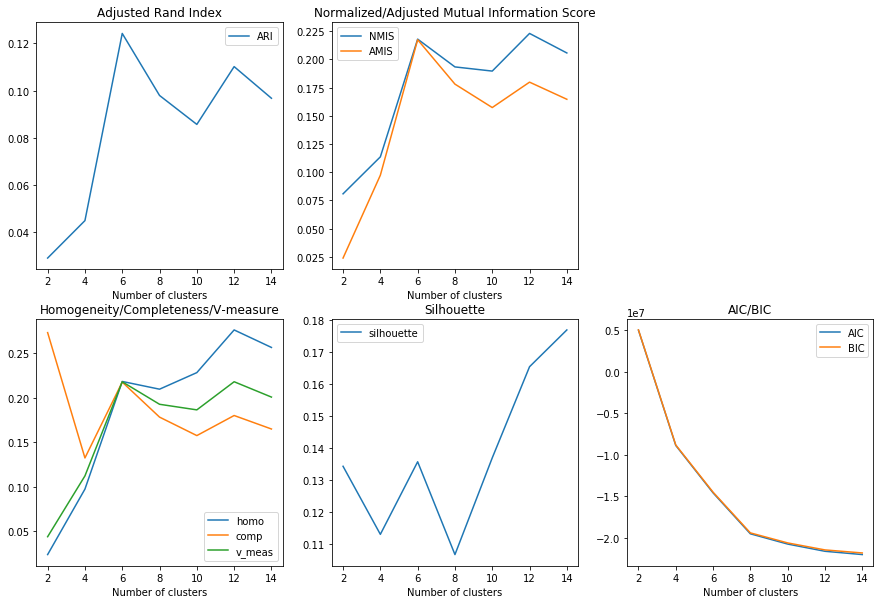

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ARI_h, = plt.plot(n_components_range, ARI2)
plt.xlabel("Number of clusters")
plt.title("Adjusted Rand Index")
plt.legend([ARI_h], ['ARI'])

plt.subplot(2,3,2)
NMIS_h, = plt.plot(n_components_range, NMIS2)
AMIS_h, = plt.plot(n_components_range, AMIS2)
plt.xlabel("Number of clusters")
plt.title("Normalized/Adjusted Mutual Information Score")
plt.legend([NMIS_h, AMIS_h], ['NMIS', 'AMIS'])

plt.subplot(2,3,4)
homo_h, = plt.plot(n_components_range, homo2)
comp_h, = plt.plot(n_components_range, comp2)
v_meas_h, = plt.plot(n_components_range, v_meas2)
plt.xlabel("Number of clusters")
plt.title("Homogeneity/Completeness/V-measure")
plt.legend([homo_h, comp_h, v_meas_h], ['homo', 'comp', 'v_meas'])


plt.subplot(2,3,5)
silhouette_h, = plt.plot(n_components_range, silhouette2)
plt.xlabel("Number of clusters")
plt.title("Silhouette")
plt.legend([silhouette_h], ['silhouette'])

plt.subplot(2,3,6)
AIC_h, = plt.plot(n_components_range, AIC)
BIC_h, = plt.plot(n_components_range, BIC)
plt.xlabel("Number of clusters")
plt.title("AIC/BIC")
plt.legend([AIC_h, BIC_h], ['AIC', 'BIC'])
plt.show()